In [1]:
from dask.distributed import Client

client = Client(n_workers=4)

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

# standard approach

In [ ]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

# dask approach

In [3]:
from dask import delayed

In [4]:
#%%time
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

In [6]:
%%time
# This actually runs our computation using a local thread pool

z.compute()

CPU times: user 94.3 ms, sys: 15.9 ms, total: 110 ms
Wall time: 2.04 s


5

# Explanation 

The z object is a lazy Delayed object. This object holds everything we need to compute the final result, including references to all of the functions that are required and their inputs and relationship to one-another. 

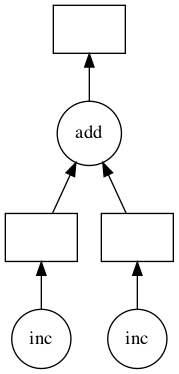

In [5]:
# Look at the task graph for `z`
z.visualize()

# dask approach with decorators

In [2]:
from dask import delayed
from time import sleep

In [3]:
@delayed
def inc(x):
    return x + 1

@delayed
def add(x, y):
    return x + y

In [4]:
x = inc(15)
y = inc(30)
total = add(x, y)

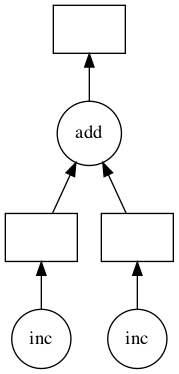

In [5]:
total.visualize()

In [6]:
total

Delayed('add-7a5a42d7-11ce-4495-a433-f0aa2ed16db8')

In [7]:
# execute all tasks
total.compute()

47